In [23]:
# read the log file, and split to lines
from pathlib import Path

log_file = Path('./logs/log.log')
with log_file.open('r') as f:
    lines = f.read()
lines = lines.splitlines(keepends=False)
len(lines), lines

(679,
 ['2023-05-02 20:19:48,327 - src.count_ngrams_in_batches - INFO - Starting to count ngrams in batches',
  "2023-05-02 20:20:33,385 - src.count_ngrams_in_batches - INFO - started working on samples 20000000-20999999;memory (MB): {'total': 8066, 'used': 6084, 'available': 1982}",
  "2023-05-02 20:20:46,091 - src.count_ngrams_in_batches - INFO - started working on samples 0-999999;memory (MB): {'total': 8066, 'used': 6681, 'available': 1385}",
  "2023-05-02 20:20:46,233 - src.count_ngrams_in_batches - INFO - started working on samples 10000000-10999999;memory (MB): {'total': 8066, 'used': 6761, 'available': 1305}",
  "2023-05-02 20:24:28,621 - src.count_ngrams_in_batches - INFO - finished samples 20000000 to 20999999;memory (MB): {'total': 8066, 'used': 7031, 'available': 1035};counter size (MB): 0",
  "2023-05-02 20:25:03,640 - src.count_ngrams_in_batches - INFO - finished samples 10000000 to 10999999;memory (MB): {'total': 8066, 'used': 7103, 'available': 963};counter size (MB): 0

In [24]:
import re
datetime_regex = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
module_name_regex = r'\w+\.\w+'
message_regex = r'.*'
log_line_regex = f'(?P<datetime>{datetime_regex}),\\d+ - ' \
                 f'(?P<module_name>{module_name_regex}) - \\w+ - ' \
                 f'(?P<message>{message_regex})'
log_line_regex = re.compile(log_line_regex)

In [25]:
# filter the lines that match the regex
def match_regex_condition(line: str) -> bool:
    return log_line_regex.match(line) is not None

lines = list(filter(match_regex_condition, lines))
len(lines), lines

(524,
 ['2023-05-02 20:19:48,327 - src.count_ngrams_in_batches - INFO - Starting to count ngrams in batches',
  "2023-05-02 20:20:33,385 - src.count_ngrams_in_batches - INFO - started working on samples 20000000-20999999;memory (MB): {'total': 8066, 'used': 6084, 'available': 1982}",
  "2023-05-02 20:20:46,091 - src.count_ngrams_in_batches - INFO - started working on samples 0-999999;memory (MB): {'total': 8066, 'used': 6681, 'available': 1385}",
  "2023-05-02 20:20:46,233 - src.count_ngrams_in_batches - INFO - started working on samples 10000000-10999999;memory (MB): {'total': 8066, 'used': 6761, 'available': 1305}",
  "2023-05-02 20:24:28,621 - src.count_ngrams_in_batches - INFO - finished samples 20000000 to 20999999;memory (MB): {'total': 8066, 'used': 7031, 'available': 1035};counter size (MB): 0",
  "2023-05-02 20:25:03,640 - src.count_ngrams_in_batches - INFO - finished samples 10000000 to 10999999;memory (MB): {'total': 8066, 'used': 7103, 'available': 963};counter size (MB): 0

In [26]:
# filter the lines of that module
module_name = 'src.aggregate_batch_ngram_counts'
def module_name_condition(line: str) -> bool:
    return log_line_regex.match(line).groupdict()['module_name'] == module_name

lines = list(filter(module_name_condition, lines))
len(lines), lines

(462,
 ['2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregate batch ngram counts - start',
  '2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregating ngrams of size 1',
  '2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - creating new table. executing query:',
  '2023-05-02 21:01:48,067 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,348 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - end',
  '2023-05-02 21:01:49,356 - src.aggregate_batch_ngram_counts - INFO - table size: 21237',
  '2023-05-02 21:01:49,373 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_1000000-1999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,784 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_100000

In [27]:
from collections.abc import Iterable
def iter_line_indices(lines: list[str], condition) -> Iterable[int]:
    for i, line in enumerate(lines):
        if condition(line):
            yield i

In [28]:
def start_condition(line: str) -> bool:
    return log_line_regex.match(line).groupdict()['message'] == 'aggregate batch ngram counts - start'

def end_condition(line: str) -> bool:
    return log_line_regex.match(line).groupdict()['message'] == 'aggregate batch ngram counts - end'

In [29]:
# identify the index of the start line
start_line_indices = list(iter_line_indices(lines, start_condition))
start_line_indices
last_start_line_index = start_line_indices[-1]
last_start_line = lines[last_start_line_index]
last_start_line

'2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregate batch ngram counts - start'

In [30]:
# identify the index of the end line
end_line_indices = list(iter_line_indices(lines, end_condition))
end_line_indices
last_end_line_index = end_line_indices[-1]
last_end_line = lines[last_end_line_index]
last_end_line

'2023-05-02 21:53:31,214 - src.aggregate_batch_ngram_counts - INFO - aggregate batch ngram counts - end'

In [31]:
lines = lines[last_start_line_index:last_end_line_index+1]
len(lines), lines

(462,
 ['2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregate batch ngram counts - start',
  '2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregating ngrams of size 1',
  '2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - creating new table. executing query:',
  '2023-05-02 21:01:48,067 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,348 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - end',
  '2023-05-02 21:01:49,356 - src.aggregate_batch_ngram_counts - INFO - table size: 21237',
  '2023-05-02 21:01:49,373 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_1000000-1999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,784 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_100000

In [39]:
# split the lines according to ngram size
ngram_size_regex = re.compile(r'aggregating ngrams of size (?P<ngram_size>\d+)')
def ngram_size_condition(line: str) -> bool:
    message = log_line_regex.match(line).group('message')
    return ngram_size_regex.match(message) is not None

ngram_size_indices = list(iter_line_indices(lines, ngram_size_condition))
ngram_size_indices

[1, 93, 185, 277, 369]

In [40]:
ngram_size_indices.append(len(lines)) # so we can slice
lines_per_ngram_size = {}
for i in range(len(ngram_size_indices) - 1):
    start_i = ngram_size_indices[i]
    end_i = ngram_size_indices[i+1]
    ngram_size = i + 1
    lines_per_ngram_size[ngram_size] = lines[start_i:end_i]
lines_per_ngram_size

{1: ['2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - aggregating ngrams of size 1',
  '2023-05-02 21:01:47,962 - src.aggregate_batch_ngram_counts - INFO - creating new table. executing query:',
  '2023-05-02 21:01:48,067 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,348 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_0-999999.parquet into table - end',
  '2023-05-02 21:01:49,356 - src.aggregate_batch_ngram_counts - INFO - table size: 21237',
  '2023-05-02 21:01:49,373 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_1000000-1999999.parquet into table - start. executing query:',
  '2023-05-02 21:01:49,784 - src.aggregate_batch_ngram_counts - INFO - merging file data\\1\\count_table_1000000-1999999.parquet into table - end',
  '2023-05-02 21:01:49,786 - src.aggregate_batch_ngram_counts - INFO - table

In [52]:
import matplotlib.pyplot as plt

In [51]:
# - plot the number of entries in the table after each insertion
def table_size_condition(line: str) -> bool:
    return log_line_regex.match(line).group('message').startswith('table size:')

table_size_message_regex = re.compile(r'table size: (?P<size>\d+)')
def extract_table_size(line: str) -> int:
    message = log_line_regex.match(line).group('message')
    return int(table_size_message_regex.match(message).group('size'))

In [43]:
def plot_table_size_per_ngram_size(ngram_size: int):
    lines_of_ngram_size = lines_per_ngram_size[ngram_size]
    table_size_lines = list(filter(table_size_condition, lines_of_ngram_size))
    table_sizes = list(map(extract_table_size, table_size_lines))
    plt.plot(table_sizes)

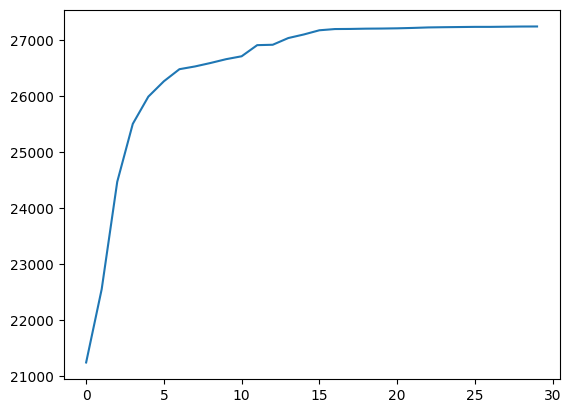

In [45]:
plot_table_size_per_ngram_size(1)

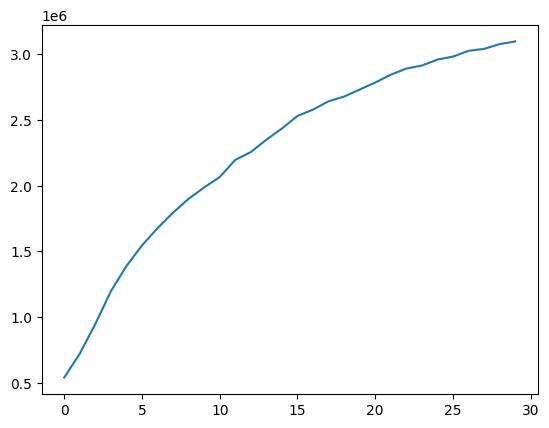

In [46]:
plot_table_size_per_ngram_size(2)

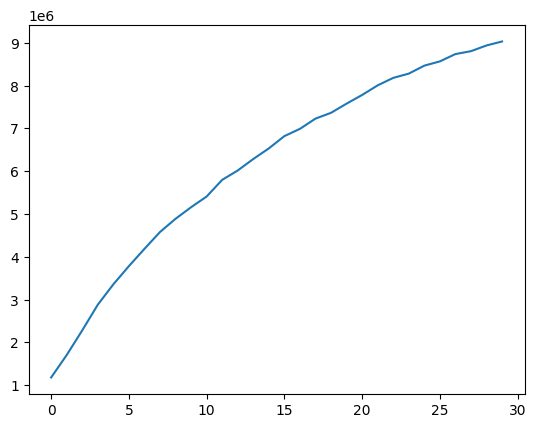

In [47]:
plot_table_size_per_ngram_size(3)

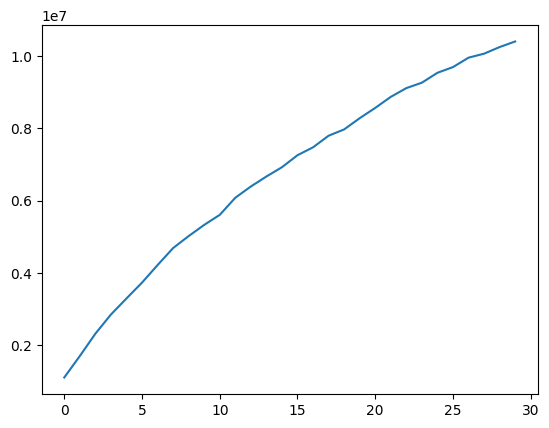

In [48]:
plot_table_size_per_ngram_size(4)

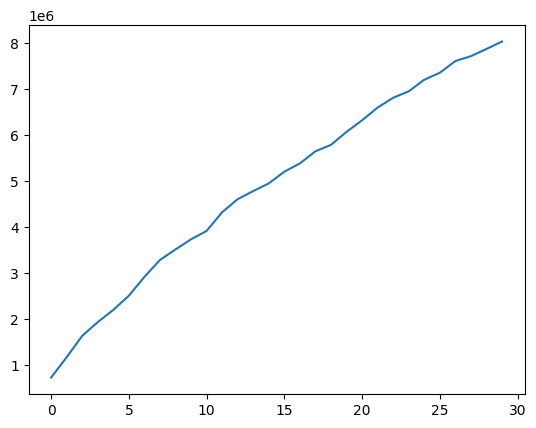

In [50]:
plot_table_size_per_ngram_size(5)

In [62]:
from datetime import datetime

def get_log_line_time(log_line: str) -> datetime:
    log_time_str = log_line_regex.match(log_line).group('datetime')
    datetime_fmt = '%Y-%m-%d %H:%M:%S'
    return datetime.strptime(log_time_str, datetime_fmt)


In [63]:
def start_merge_condition(line: str) -> bool:
    return 'merging file' in line and 'start' in line

def end_merge_condition(line: str) -> bool:
    return 'merging file' in line and 'end' in line


In [64]:
# - plot the time it took for each sample, according to the ngram size
def plot_merge_times_per_ngram_size(ngram_size: int):
    lines_of_ngram_size = lines_per_ngram_size[ngram_size]
    start_merge_lines = list(filter(start_merge_condition, lines_of_ngram_size))
    end_merge_lines = list(filter(end_merge_condition, lines_of_ngram_size))
    start_times = map(get_log_line_time, start_merge_lines)
    end_times = map(get_log_line_time, end_merge_lines)
    time_deltas = [end_time - start_time for start_time, end_time in zip(start_times, end_times)]
    times_in_sec = list(map(lambda t: t.seconds, time_deltas))
    plt.plot(times_in_sec)

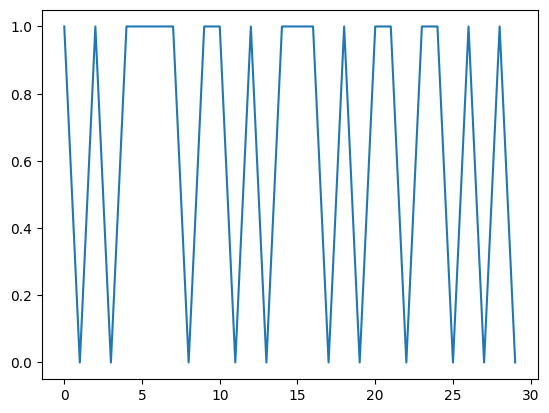

In [65]:
plot_merge_times_per_ngram_size(1)

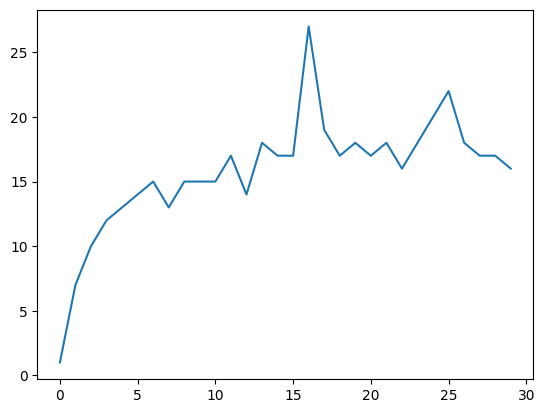

In [66]:
plot_merge_times_per_ngram_size(2)

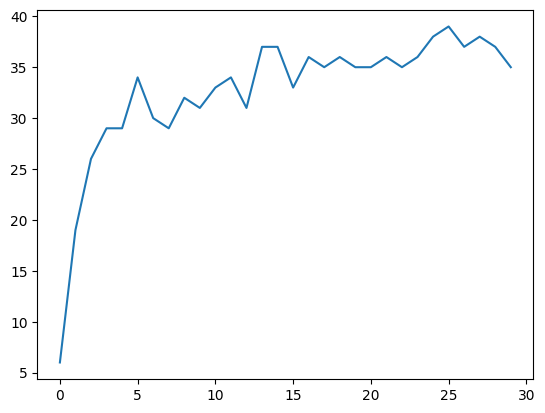

In [67]:
plot_merge_times_per_ngram_size(3)

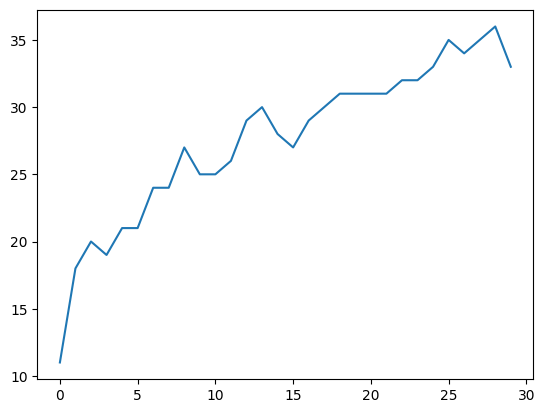

In [68]:
plot_merge_times_per_ngram_size(4)

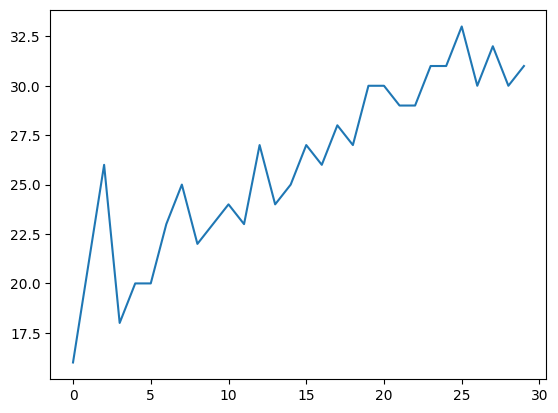

In [69]:
plot_merge_times_per_ngram_size(5)

In [70]:
import json
total_ngram_per_size_file = Path('./data/total_ngrams_per_size.json')
with total_ngram_per_size_file.open('r') as f:
    total_ngram_per_size = json.load(f)
total_ngram_per_size
n_tokens_processed = total_ngram_per_size['1']
n_tokens_processed

442371415

In [71]:
n_tokens_wikipedia =     24_000_000_000  # 24 Billion
n_tokens_red_pajama = 1_200_000_000_000  # 1.2 Trillion

In [73]:
# - total time, and extrapolate (n log (n) in the number of tokens) to wiki and RedPajama
start_time = get_log_line_time(lines[0])
end_time = get_log_line_time(lines[-1])
total_time_seconds = (end_time - start_time).seconds
total_time_seconds

3104

In [74]:
# assuming n log(n) relationship
from math import log2

def extrapolate_time(n1: int, n2: int, time1: int):
    constant = time1 / (n1 * log2(n1))
    return constant * (n2 * log2(n2))


In [76]:
expected_wiki_time_sec = extrapolate_time(n_tokens_processed, n_tokens_wikipedia, total_time_seconds)
print(f'wikipedia expected time: {expected_wiki_time_sec / 3600:.3f} hours')

wikipedia expected time: 56.162 hours


In [78]:
expected_red_pajama_time_sec = extrapolate_time(n_tokens_processed, n_tokens_red_pajama, total_time_seconds)
print(f'RedPajama expected time: {expected_red_pajama_time_sec / (3600 * 24):.3f} days') # with the same number of workers=3

RedPajama expected time: 136.155 days


In [79]:
# - total space, extrapolate (n to the number of tokens) to wiki and RedPajama
database_file = Path('./data/ngram_data.duckdb')

def get_file_size_in_bytes(file: Path) -> int:
    return file.stat().st_size

In [81]:
database_size_in_bytes = get_file_size_in_bytes(database_file)
database_size_in_gb = database_size_in_bytes // (2 ** 30)
database_size_in_gb

3

In [87]:
# it is probably less then that, since there will be less entries...
def extrapolate_size(n1: int, n2: int, size: int) -> int:
    factor = n2 / n1
    return round(factor * size)

In [88]:
expected_size_wiki_bytes = extrapolate_size(n_tokens_processed, n_tokens_wikipedia, database_size_in_bytes)
expected_size_wiki_gb = expected_size_wiki_bytes / (2 ** 30)
print(f'expected wikipedia database size: {expected_size_wiki_gb:.3f} GB')

expected wikipedia database size: 188.813 GB


In [89]:
expected_size_red_pajama_bytes = extrapolate_size(n_tokens_processed, n_tokens_red_pajama, database_size_in_bytes)
expected_size_red_pajama_gb = expected_size_red_pajama_bytes / (2 ** 30)
print(f'expected red pajama database size: {expected_size_red_pajama_gb:.3f} GB')

expected red pajama database size: 9440.672 GB
